In [1]:
import pickle as p
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal
# from __future__ import division
from mpl_toolkits.mplot3d import Axes3D
# import holoviews as hv
# hv.extension('bokeh')
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#regular import
#if you use python3, change "cPickle" to "pickle". 
#Be aware of the upper and lower cases. 
#You also need to replace all the "cPickle" in the Compute.jl if your julia uses python3

In [2]:
#Be aware that this "N" has to match the "N" in the Compute.jl (dimensionality)
M=200
x = np.linspace(0,2*np.pi,M)
y = np.linspace(0,2*np.pi,M)[::-1]

In [3]:
sintr=np.array([[-0.09729225+0.18721252j, -0.07882004-0.24238664j, -0.67349386-0.04675716j,
  -0.22508182+0.61974169j],
 [ 0.04659038-0.87924473j, -0.23352839-0.31542235j, -0.13570125-0.12613414j,
   0.18823231+0.03122859j],
 [ 0.29039607+0.12584915j, -0.65686014-0.19951824j, -0.07657441+0.23917228j,
  -0.46391008-0.38765933j],
 [-0.27405583-0.0704929j,   0.18227499-0.52584446j,  0.50471236+0.43828478j,
  -0.30324598+0.2672103j ]])

In [ ]:
# The below will always use phi3 = 1.5, sintr, saved in S_weyl_1

In [18]:
#save the desired S matrix into a new file to the directory 

with open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/S matrix/S_weyl_1.pickle', 'wb') as handle:
    p.dump(sintr, handle, protocol=2)#protocol=p.HIGHEST_PROTOCOL)

In [8]:
with open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/Summation/Summation_S_weyl_1.pickle', 'rb') as handle:
    Curvature = p.load(handle, encoding='latin1')
#     phi3 = -0.4

In [13]:
with open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/Landauer/Landauer_S_weyl_1.pickle', 'rb') as handle:
    Landauer = -p.load(handle, encoding='latin1')

In [14]:
Landauer*(np.pi**2)*4

array([[-0.5578511+0.j, -0.5578511+0.j, -0.5578511+0.j, ...,
        -0.5578511+0.j, -0.5578511+0.j, -0.5578511+0.j],
       [-0.5578511+0.j, -0.5578511+0.j, -0.5578511+0.j, ...,
        -0.5578511+0.j, -0.5578511+0.j, -0.5578511+0.j],
       [-0.5578511+0.j, -0.5578511+0.j, -0.5578511+0.j, ...,
        -0.5578511+0.j, -0.5578511+0.j, -0.5578511+0.j],
       ...,
       [-0.5578511+0.j, -0.5578511+0.j, -0.5578511+0.j, ...,
        -0.5578511+0.j, -0.5578511+0.j, -0.5578511+0.j],
       [-0.5578511+0.j, -0.5578511+0.j, -0.5578511+0.j, ...,
        -0.5578511+0.j, -0.5578511+0.j, -0.5578511+0.j],
       [-0.5578511+0.j, -0.5578511+0.j, -0.5578511+0.j, ...,
        -0.5578511+0.j, -0.5578511+0.j, -0.5578511+0.j]])

Text(0.5, 1.0, '')

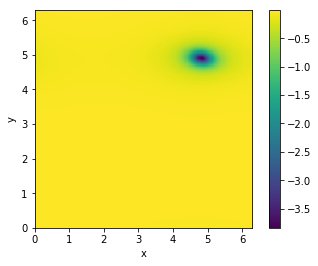

In [9]:
#regular plot of the array against the N by N x-y grid
CurvatureReal = Curvature.real
CurvatureImage= plt.imshow(CurvatureReal, extent = (x[0], x[-1], y[-1], y[0]))
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(CurvatureImage)
plt.title('', size=15)

In [ ]:
#Accurate phase integral for each curvature. Accuracy set to 1e-8
#This accuracy can be changed only from the core.jl
with open('/PathToTheNumberFromPhaseIntegration.pickle', 'rb') as handle:
    correspondingnumber = p.load(handle, encoding='latin1')

In [509]:
X,Y = np.meshgrid(x,y)

In [106]:
import scipy as sp
from scipy.stats import ortho_group as og
from numpy.linalg import inv, eigvals
from __future__ import division
def sGeneral(n): #QR decomposition. Q being the unitary matrix.
    H = np.random.randn(n,n) + 1.j*np.random.randn(n,n)
    Q,R = sp.linalg.qr(H)
    return Q

In [10]:
Curvature1Real = Curvature1.real
fig = plt.figure(figsize=(10.,10.))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Curvature1Real, cmap=cm.coolwarm,
                       linewidth=0)
cset = ax.contourf(X, Y, Curvature1Real, zdir='z', offset=-0.09, cmap=cm.coolwarm)
ax.set_zlim(-0.09, 0.04)
ax.w_zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
# ax.set_zlabel('Z')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=15)

plt.show()

NameError: name 'Curvature1' is not defined

In [5]:
with open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/Berry/Berry_S_weyl_1.pickle', 'rb') as handle:
    Berry = p.load(handle, encoding='latin1')

Text(0.5, 1.0, '')

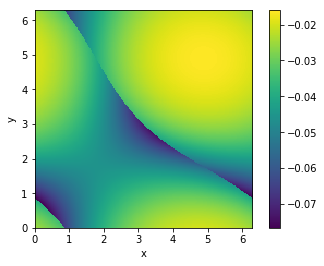

In [15]:
BerryReal = Berry.real
BerryImage= plt.imshow(CurvatureReal-BerryReal+Landauer.real, extent = (x[0], x[-1], y[-1], y[0]))
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(BerryImage)
plt.title('', size=15)

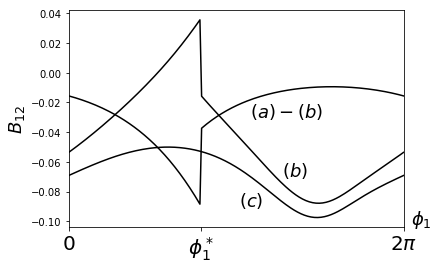

In [36]:
N = 80
font1 = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 18,
        }
fig = plt.figure()
continuous = CurvatureReal[N,:]
jump = BerryReal[N,:]
plt.plot(x,2*continuous,'k')
# plt.plot(x,jump,'b')
plt.plot(x,2*continuous-2*jump,'k')
plt.plot(x,2*jump,'k')
plt.xticks((0,2.48,2*np.pi), (r'$0$',r'$\phi_1^*$', r'$2\pi$'), color='k', size=20)
# plt.text(3.5, -0.06, r'$\phi_1$', fontdict=font1)
plt.text(3.4, -0.03, r'$(a)-(b)}$', fontdict=font1)
plt.text(3.2, -0.09, r'$(c)$', fontdict=font1)
plt.text(4, -0.07, r'$(b)$', fontdict=font1)
plt.ylabel('$B_{12}$', fontdict=font1)
plt.text(6.42, -0.102, r'$\phi_1$', fontdict=font1)
plt.xlim(0, 2*np.pi)
plt.show()
fig.savefig('/Users/yuguangchen/Projects/Tex/conclusion/jump.pdf', bbox_inches='tight')
plt.close(fig)

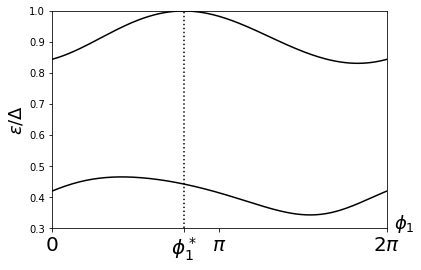

In [31]:
# N = 80
with open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/LowestABS/Lowestabs_S_weyl_1.pickle', 'rb') as handle:
    LowestABS = p.load(handle, encoding='latin1').real
with open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/HighestABS/Highestabs_S_weyl_1.pickle', 'rb') as handle:
    HighestABS = p.load(handle, encoding='latin1').real
fig = plt.figure()
Low = LowestABS[N,:]
High = HighestABS[N,:]
plt.plot(x,Low,'k')
plt.plot(x,High,'k')
plt.xlim(0, 2*np.pi) 
plt.ylim(0.3, 1.0) 
# plt.text(3, 0.15, r'$\phi_1$', fontdict=font1)
plt.xticks((0,2.48,np.pi,2*np.pi), (r'$0$',r'$\phi_1^*$','$\pi$', r'$2\pi$'), color='k', size=20)
plt.ylabel('$\epsilon/\Delta$', fontdict=font1)
# plt.xlabel('$\phi_1$', fontdict=font1)
plt.text(6.42, 0.3, r'$\phi_1$', fontdict=font1)
plt.axvline(x=2.48, color='k', linestyle=':')
plt.show()
fig.savefig('/Users/yuguangchen/Projects/Tex/conclusion/ABS.pdf', bbox_inches='tight')
plt.close(fig)


In [297]:
200-0.233/(2*np.pi/400)

185.16675930383536

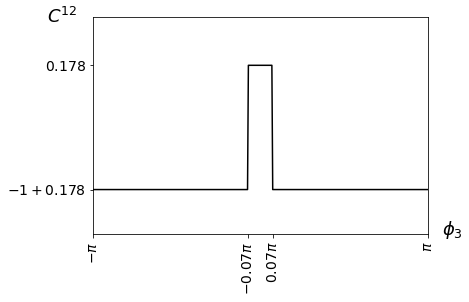

In [5]:
N=400
font0 = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 18,
        }
font1 = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 18,
        }
xx = np.linspace(-np.pi,np.pi,N)
z = np.ones(400)
z[0:185] = z[214:2400] = 0
z
fig = plt.figure()
plt.plot(xx,z+0.36,color = 'k')
plt.ylim((0,1.75))
plt.xticks((-np.pi,-0.233,0.233,np.pi), (r'$-\pi$',r'$-0.07\pi$', r'$0.07\pi$',r'$\pi$'), color='k', size=14, rotation='90')
plt.yticks((0.36,1.36), (r'$-1+0.178$',r'$0.178$'), color='k', size=14)
plt.text(-4, 1.7, r'$C^{12}$', fontdict=font1)
plt.text(3.4,0, r'$\phi_3$', fontdict=font1)

plt.xlim(-np.pi, np.pi) 
plt.show()
fig.savefig('/Users/yuguangchen/Projects/Tex/conclusion/number.pdf', bbox_inches='tight')
plt.close(fig)

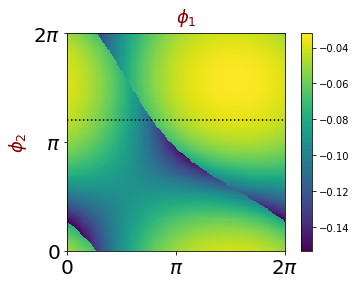

In [41]:
font1 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
with open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/Summation/Summation_S_weyl_1.pickle', 'rb') as handle:
    Curvature1_5 = p.load(handle, encoding='latin1').real
with open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/Berry/Berry_S_weyl_1.pickle', 'rb') as handle:
    Berry1_5 = p.load(handle, encoding='latin1').real
with open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/Landauer/Landauer_S_weyl_1.pickle', 'rb') as handle:
    Landauer1_5 = -p.load(handle, encoding='latin1').real
fig = plt.figure()
overall = Curvature1_5-Berry1_5+Landauer1_5
Curvature1_5Image= plt.imshow(2*overall, extent = (x[0], x[-1], y[-1], y[0]))
# plt.xlabel(r'$\phi_1$', fontdict=font1)
plt.text(3.14, 6.6, r'$\phi_1$', fontdict=font1)
plt.ylabel(r'$\phi_2$', fontdict=font1)
plt.xticks((0,np.pi,2*np.pi), (r'$0$', r'$\pi$',r'$2\pi$'), color='k', size=20)
plt.yticks((0,np.pi,2*np.pi), (r'$0$', r'$\pi$',r'$2\pi$'), color='k', size=20)
# plt.text(-1.6, 2.95, r'$\phi_2$', fontdict=font1)
plt.colorbar(Curvature1_5Image)
# plt.title('', size=15)
plt.axhline(y=3.77, color='k', linestyle=':')
plt.show()
# fig.savefig('/Users/yuguangchen/Projects/Tex/conclusion/jumpcolor.pdf', bbox_inches='tight')
plt.close(fig)

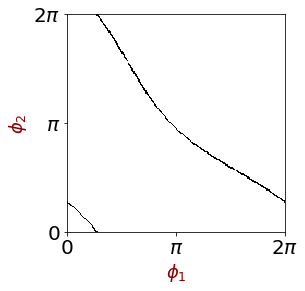

In [246]:
target = np.ones((200,200))
for i in range(200):
    for j in range(200):
        if (overall[(i+1)%200,(j+1)%200]-overall[i,j])*(overall[i,j]-overall[(i-1)%200,(j-1)%200])<0. and overall[(i+1)%200,(j+1)%200]-overall[i,j]>0.0016:
            target[i,j] = target[(i+1)%200,(j+1)%200] = target[(i-1)%200,(j-1)%200] = 0.
for i in range(200):
    for j in range(200):
        if abs(overall[i,j]-overall[(i+1)%200,(j+1)%200])>0.0016:
            target[i,j] = target[(i+1)%200,(j+1)%200] = target[(i-1)%200,(j-1)%200] = 0.
for i in range(200):
    for j in range(200):
        if abs(overall[j,i]-overall[(j+1)%200,i])>0.0016:
            target[j,i] = target[(j+1)%200,(i+1)%200] = target[(j-1)%200,(i-1)%200] = 0.
fig = plt.figure()
plt.imshow(target, cmap='binary_r', extent = (x[0], x[-1], y[-1], y[0]))
plt.xlabel(r'$\phi_1$', fontdict=font1)
plt.ylabel(r'$\phi_2$', fontdict=font1)
plt.xticks((0,np.pi,2*np.pi), (r'$0$', r'$\pi$',r'$2\pi$'), color='k', size=20)
plt.yticks((0,np.pi,2*np.pi), (r'$0$', r'$\pi$',r'$2\pi$'), color='k', size=20)
plt.show()
fig.savefig('/Users/yuguangchen/Projects/Tex/conclusion/touchpoint.pdf', bbox_inches='tight')
plt.close(fig)

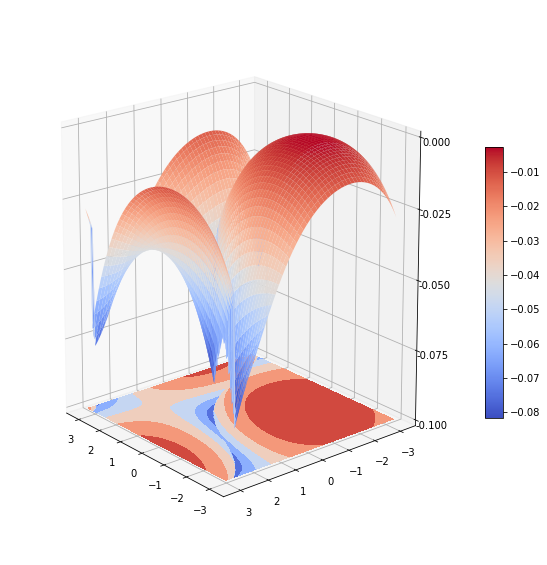

In [492]:
fig = plt.figure(figsize=(10.,10.))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, CurvatureReal-BerryReal, cmap=cm.coolwarm,
                       linewidth=0)
cset = ax.contourf(X, Y, CurvatureReal-BerryReal, zdir='z', offset=-0.1, cmap=cm.coolwarm)
ax.set_zlim(-0.1, 0.)
ax.w_zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
ax.view_init(elev=17., azim=140)
# ax.set_zlabel('Z')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=15)

plt.show()

In [ ]:
font1 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
with open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/Summation/Summation_S_weyl_1.pickle', 'rb') as handle:
    Curvature1_5 = p.load(handle).real
with open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/Berry/Berry_S_weyl_1.pickle', 'rb') as handle:
    Berry1_5 = p.load(handle).real
with open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/Landauer/Landauer_S_weyl_1.pickle', 'rb') as handle:
    Landauer1_5 = -p.load(handle).real
fig = plt.figure()
overall = Curvature1_5-Berry1_5+Landauer1_5
Curvature1_5Image= plt.imshow(overall, extent = (x[0], x[-1], y[-1], y[0]))
plt.xlabel(r'$\phi_1$', fontdict=font1)
plt.ylabel(r'$\phi_2$', fontdict=font1)
plt.xticks((0,np.pi,2*np.pi), (r'$0$', r'$\pi$',r'$2\pi$'), color='k', size=20)
plt.yticks((0,np.pi,2*np.pi), (r'$0$', r'$\pi$',r'$2\pi$'), color='k', size=20)
# plt.text(-1.6, 2.95, r'$\phi_2$', fontdict=font1)
plt.colorbar(Curvature1_5Image)
# plt.title('', size=15)
plt.axhline(y=3.77, color='k', linestyle=':')
plt.show()
# fig.savefig('/Users/yuguangchen/Projects/Tex/conclusion/jumpcolor.pdf', bbox_inches='tight')
plt.close(fig)

In [ ]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
		def __init__(self, xs, ys, zs, *args, **kwargs):
			FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
			self._verts3d = xs, ys, zs

		def draw(self, renderer):
			xs3d, ys3d, zs3d = self._verts3d
			xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
			self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
			FancyArrowPatch.draw(self, renderer)

In [ ]:

import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# your ellispsoid and center in matrix form
# give matrix T, A = np.transpose(T).dot(T)
# T = np.array([[ 1,  2,  3],[ 5,  7,  2],[13,  2,  7]])
# A = np.transpose(T).dot(T)
A = np.array([[1,0,0],[0,2,0],[0,0,2]])
center = [0.5,0.5,0.5]

# find the rotation matrix and radii of the axes
U, s, rotation = linalg.svd(A)
radii = 1.0/np.sqrt(s)

# now carry on with EOL's answer
u = np.linspace(0.0, 2.0 * np.pi, 100)
v = np.linspace(0.0, np.pi, 100)
x = radii[0] * np.outer(np.cos(u), np.sin(v))
y = radii[1] * np.outer(np.sin(u), np.sin(v))
z = radii[2] * np.outer(np.ones_like(u), np.cos(v))
for i in range(len(x)):
    for j in range(len(x)):
        [x[i,j],y[i,j],z[i,j]] = np.dot([x[i,j],y[i,j],z[i,j]], rotation) + center

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z,  rstride=4, cstride=4, color='b', alpha=0.2)
plt.show()
plt.close(fig)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z,  rstride=22, cstride=33, color='b', alpha=0.2, zorder = -1)
ax.plot_surface(x, y, z, color='b', alpha=0.2, zorder = 0)
ax.plot(0.5*np.ones(20),0.5*np.ones(20),np.linspace(-1,2,20), color='red', alpha=.5, linewidth=2, zorder=1)
ax.plot(0.55*np.ones(20),0.55*np.ones(20),np.linspace(-1,2,20), color='red', alpha=.5, linewidth=2, linestyle='dashed', zorder=2)
ax.scatter(0.5*np.ones(1),0.5*np.ones(1),0.5*np.ones(1), color='red', marker='*')
ax.quiver(0.5,0.5,2,0,0,1,length=0.1, color = 'red', normalize=True)
# plt.axis('off')
fig.savefig('/Users/yuguangchen/Projects/Tex/conclusion/ellipsoid.pdf', bbox_inches='tight')
plt.show()

In [4]:
fig = plt.figure()
phase = np.linspace(-1,1,20)
downin = 3*phase + 1
downde = -3*phase + 1
upin = 3*phase - 1
upde = -3*phase -1
plt.plot(phase, downin, color='red')
plt.plot(phase, downde, color='red')
plt.plot(phase, upin, color='blue')
plt.plot(phase, upde, color='blue')
plt.plot(phase, np.zeros_like(phase), color='black')
plt.xticks((0,), (r'$\phi^{0}$', r''), color='k', size=18)
plt.yticks((0,), (r'$0$', r''), color='k', size=18)
plt.ylabel(r'$\epsilon/\Delta$', fontdict=font1)
plt.text(1, -5, r'$\phi_3$', fontdict=font1)
fig.savefig('/Users/yuguangchen/Projects/Tex/conclusion/levelweyl.pdf', bbox_inches='tight')
plt.show()

9

In [ ]:
fig = plt.figure()
phase = np.linspace(-1,1,20)
downin = np.sqrt(9*phase**2 + 0.2)+1
downde = -np.sqrt(9*phase**2 + 0.2)+1
upin = np.sqrt(9*phase**2 + 0.2)-1
upde = -np.sqrt(9*phase**2 + 0.2)-1
plt.plot(phase, downin, color='red')
plt.plot(phase, downde, color='red')
plt.plot(phase, upin, color='blue')
plt.plot(phase, upde, color='blue')
plt.plot(phase, np.zeros_like(phase), linestyle = 'dashed', color='black')
plt.xticks((0,), (r'$\phi^{0}$', r''), color='k', size=18)
plt.yticks((0,), (r'$0$', r''), color='k', size=18)
plt.ylabel(r'$\epsilon/\Delta$', fontdict=font1)
plt.text(1, -5, r'$\phi_3$', fontdict=font1)
fig.savefig('/Users/yuguangchen/Projects/Tex/conclusion/leveloffweyl.pdf', bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure()
phase = np.linspace(-1,1,20)
downin = 3*phase
downde = -3*phase
plt.plot(phase, downin, color='green')
plt.plot(phase, downde, color='green')
plt.plot(phase, np.zeros_like(phase), color='black')
plt.xticks((0,), (r'$\phi^{0}$', r''), color='k', size=18)
plt.yticks((0,), (r'$0$', r''), color='k', size=18)
plt.ylabel(r'$\epsilon/\Delta$', fontdict=font1)
plt.text(1, -5, r'$\phi_3$', fontdict=font1)
fig.savefig('/Users/yuguangchen/Projects/Tex/conclusion/leveldegenerate.pdf', bbox_inches='tight')
plt.show()

In [ ]:
phase = np.linspace(-np.pi,np.pi,100)
detT=linalg.det(T)
k0 = 6.
out = np.zeros(100)
for x in xrange(100):
        if -k0<c*phase[x]<k0:
            out[x] = 0.5*np.sign(detT)*c*phase[x]/k0
        else:
            out[x] = 0.5*np.sign(detT)*np.sign(phase[x])
fig = plt.figure()
plt.plot(phase, out, color='green')
plt.plot(phase, np.zeros_like(phase), linestyle = 'dashed', color='black')
plt.xticks((-1.144,0,1.144), (r'$-|K_0|/c$', r'0',r'$|K_0|/c$'), color='k', size=18)
plt.yticks((-0.5,0,0.5), (r'$-0.5$', r'0',r'0.5'), color='k', size=18)
plt.ylabel(r'$C^{12}$', fontdict=font1)
plt.text(np.pi, -0.6, r'$\phi_3$', fontdict=font1)
plt.xlim(-np.pi, np.pi)
fig.savefig('/Users/yuguangchen/Projects/Tex/conclusion/Chernchange.pdf', bbox_inches='tight')
plt.show()

In [8]:
2.48/np.pi

0.7894085177358009

In [19]:
p.load(open('/Users/yuguangchen/Projects/Tex/new structure/simulation/non-zero phi3/s matrix generating/all in one/S matrix/S_weyl_1.pickle', 'rb'))

array([[-0.09729225+0.18721252j, -0.07882004-0.24238664j,
        -0.67349386-0.04675716j, -0.22508182+0.61974169j],
       [ 0.04659038-0.87924473j, -0.23352839-0.31542235j,
        -0.13570125-0.12613414j,  0.18823231+0.03122859j],
       [ 0.29039607+0.12584915j, -0.65686014-0.19951824j,
        -0.07657441+0.23917228j, -0.46391008-0.38765933j],
       [-0.27405583-0.0704929j ,  0.18227499-0.52584446j,
         0.50471236+0.43828478j, -0.30324598+0.2672103j ]])